In [1]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,8

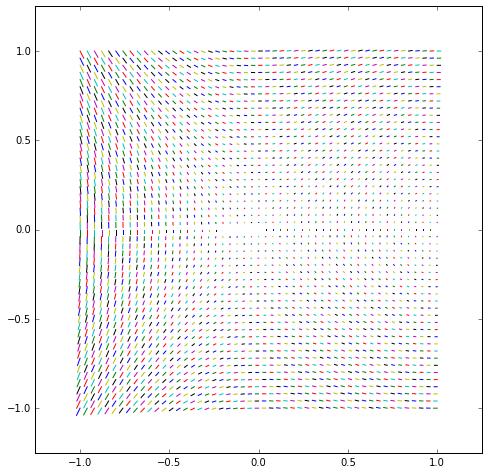

In [73]:
N = 25

dx = 1.0/N

x = np.arange(-1,1+dx, dx)

t = np.arange(0,1,0.5)

z = x[None,...] + 1j*x[...,None]

a = z.real
b = z.imag

dz = b + 1j*(a + 0.01*b - a**2)

w  = z.reshape((2*N+1)**2)

dw = 0.02*dz.reshape((2*N+1)**2)

plt.plot( np.vstack([w.real, (w+dw).real]) , np.vstack([w.imag, (w+dw).imag]) , '-')

plt.xlim([-1.25, 1.25])
plt.ylim([-1.25, 1.25])

plt.show()

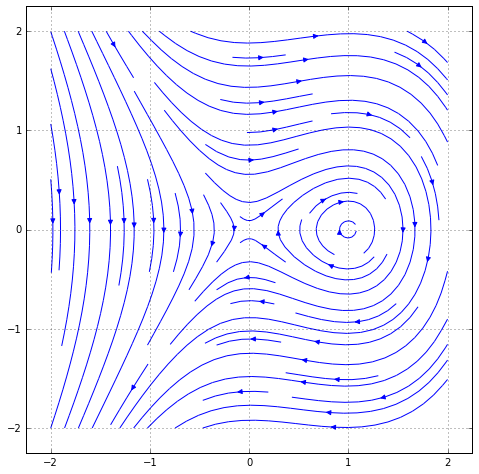

In [77]:
# https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.streamplot

N  = 25
dx = 1.0/N
x  = np.arange(-2,2+dx, dx)

z = x[None,...] + 1j*x[...,None]

a = z.real
b = z.imag

dz = b + 1j*(a + 0.01*b - a**2)

plt.streamplot(x,x,dz.real, dz.imag)


plt.xlim([-2.25, 2.25])
plt.ylim([-2.25, 2.25])

plt.grid(True)

plt.show()

In [78]:
import inspect

In [80]:
print inspect.getsource(plt.streamplot)

@_autogen_docstring(Axes.streamplot)
def streamplot(x, y, u, v, density=1, linewidth=None, color=None, cmap=None,
               norm=None, arrowsize=1, arrowstyle='-|>', minlength=0.1,
               transform=None, zorder=1, start_points=None, hold=None, data=None):
    ax = gca()
    # allow callers to override the hold state by passing hold=True|False
    washold = ax.ishold()

    if hold is not None:
        ax.hold(hold)
    try:
        ret = ax.streamplot(x, y, u, v, density=density, linewidth=linewidth,
                            color=color, cmap=cmap, norm=norm,
                            arrowsize=arrowsize, arrowstyle=arrowstyle,
                            minlength=minlength, transform=transform,
                            zorder=zorder, start_points=start_points, data=data)
    finally:
        ax.hold(washold)
    sci(ret.lines)
    return ret



In [84]:
print inspect.getsource(plt.gca)

def gca(**kwargs):
    """
    Get the current :class:`~matplotlib.axes.Axes` instance on the
    current figure matching the given keyword args, or create one.

    Examples
    ---------
    To get the current polar axes on the current figure::

        plt.gca(projection='polar')

    If the current axes doesn't exist, or isn't a polar one, the appropriate
    axes will be created and then returned.

    See Also
    --------
    matplotlib.figure.Figure.gca : The figure's gca method.
    """
    return gcf().gca(**kwargs)



In [87]:
import matplotlib.axes as ax

In [88]:
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.streamplot.html

print inspect.getsource(ax.Axes.streamplot)

        @functools.wraps(func)
        def inner(ax, *args, **kwargs):
            # this is needed because we want to change these values if
            # arg_names_at_runtime==True, but python does not allow assigning
            # to a variable in a outer scope. So use some new local ones and
            # set them to the already computed values.
            _label_pos = label_pos
            _label_namer_pos = label_namer_pos
            _arg_names = arg_names

            label = None

            data = kwargs.pop('data', None)
            if data is not None:
                if arg_names_at_runtime:
                    # update the information about replace names and
                    # label position
                    _arg_names = positional_parameter_names(args, data)
                    if (label_namer and  # we actually want a label here ...
                            _arg_names and  # and we can find a label in *args
                            (label_namer in _arg_nam